In [1]:
!pip install ipywidgets
import widgets

ModuleNotFoundError: No module named 'widgets'

In [2]:
import json 
import numpy as np
import pandas as pd

In [3]:
import io
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
from pandas.plotting import scatter_matrix

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Pre-Proccessing Steps

In [6]:
#Import CSV
import pandas as pd
df_raw = pd.read_csv('FINAL_DATAFRAME.csv')

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99677 entries, 0 to 99676
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POINT_X            99677 non-null  float64
 1   POINT_Y            99677 non-null  int64  
 2   AGE                99677 non-null  int64  
 3   HEIGHT             99677 non-null  float64
 4   OSM_ID             99677 non-null  int64  
 5   ENVELOPE_AREA      99677 non-null  float64
 6   WALL_AREA          99677 non-null  float64
 7   PERIMETER          99677 non-null  float64
 8   AREA               99677 non-null  float64
 9   HEIGHT/AREA        99677 non-null  float64
 10  AV_NO_FLOORS       99677 non-null  int64  
 11  VOLUME             99677 non-null  float64
 12  VERTEX_COMPLEXITY  99677 non-null  float64
 13  PER(A)/AREA        99677 non-null  float64
 14  MBR_LENGTH         99677 non-null  float64
 15  MBR_WIDTH          99677 non-null  float64
 16  MBR_AREA           996

In [8]:
# checking columns for missing values
df_raw.isna().sum()

POINT_X              0
POINT_Y              0
AGE                  0
HEIGHT               0
OSM_ID               0
ENVELOPE_AREA        0
WALL_AREA            0
PERIMETER            0
AREA                 0
HEIGHT/AREA          0
AV_NO_FLOORS         0
VOLUME               0
VERTEX_COMPLEXITY    0
PER(A)/AREA          0
MBR_LENGTH           0
MBR_WIDTH            0
MBR_AREA             0
MBR_L/W              0
ERI                  0
CONVEX               0
RI                   0
DENSITY              0
VOIDAREA_STD         0
NO_POLYLINES         0
NO_OF_INTRUSIONS     0
BBOX(A)/AREA         0
POINT_ON_BBOX        0
SEGMENTS_STD         0
SEGMENTS_AV          0
REG_VERTICES         0
PER/AREA             0
AREA-VOIDAREA        0
VERTEX_COUNT(S)      0
dtype: int64

In [9]:
# Select subset of columns aka variables
Columns_of_interest = ["POINT_X" ,
                      "POINT_Y",
                      "OSM_ID",
                      "AGE",
                      "HEIGHT",
                      "AREA",
                      "VOLUME",
                      "MBR_LENGTH",
                      "MBR_WIDTH",
                      "MBR_L/W",
                      "PERIMETER",
                      "WALL_AREA",
                       "VERTEX_COUNT(S)",
                       "VERTEX_COMPLEXITY",
                       "ERI",
                       "CONVEX",
                       "RI",
                       "DENSITY",
                       "NO_POLYLINES",
                       "BBOX(A)/AREA",
                       "PER/AREA",
                       "AREA-VOIDAREA",
                      ]
# create new dataframe 
df = df_raw[Columns_of_interest]

In [10]:
# Finding correlation (uncover correlated variables)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\james\AppData\Local\Temp\ipykernel_15348\2887697062.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,POINT_X,POINT_Y,OSM_ID,AGE,HEIGHT,AREA,VOLUME,MBR_LENGTH,MBR_WIDTH,MBR_L/W,PERIMETER,WALL_AREA,VERTEX_COUNT(S),VERTEX_COMPLEXITY,ERI,CONVEX,RI,DENSITY,NO_POLYLINES,BBOX(A)/AREA,PER/AREA,AREA-VOIDAREA
POINT_X,1.00,-0.25,0.07,-0.01,-0.07,0.02,0.00,0.03,0.02,0.03,0.03,-0.00,0.03,0.01,0.03,0.03,-0.01,-0.00,-0.01,-0.04,0.02,0.02
POINT_Y,-0.25,1.00,-0.03,-0.10,0.01,-0.02,-0.02,-0.05,-0.03,-0.06,-0.05,-0.02,-0.06,-0.03,-0.04,-0.04,0.01,-0.01,0.00,0.04,0.08,-0.02
OSM_ID,0.07,-0.03,1.00,0.07,-0.03,-0.09,-0.09,-0.07,-0.08,0.00,-0.08,-0.07,-0.09,-0.00,-0.11,-0.04,0.03,-0.25,-0.24,0.03,0.04,-0.07
AGE,-0.01,-0.10,0.07,1.00,-0.21,0.02,0.01,-0.05,0.05,-0.21,-0.01,-0.05,0.00,-0.10,-0.06,-0.04,0.00,0.00,-0.01,0.08,-0.07,0.02
HEIGHT,-0.07,0.01,-0.03,-0.21,1.00,0.22,0.35,0.31,0.29,0.12,0.30,0.56,0.16,0.18,0.07,0.06,-0.08,0.02,0.03,-0.07,-0.46,0.23
AREA,0.02,-0.02,-0.09,0.02,0.22,1.00,0.86,0.82,0.80,0.11,0.89,0.76,0.55,0.15,0.49,0.42,-0.21,0.30,0.34,-0.27,-0.43,0.99
VOLUME,0.00,-0.02,-0.09,0.01,0.35,0.86,1.00,0.77,0.73,0.11,0.80,0.91,0.46,0.14,0.43,0.40,-0.18,0.25,0.24,-0.24,-0.39,0.85
MBR_LENGTH,0.03,-0.05,-0.07,-0.05,0.31,0.82,0.77,1.00,0.71,0.44,0.94,0.85,0.57,0.25,0.55,0.54,-0.23,0.21,0.23,-0.40,-0.52,0.83
MBR_WIDTH,0.02,-0.03,-0.08,0.05,0.29,0.80,0.73,0.71,1.00,-0.19,0.86,0.75,0.63,0.27,0.62,0.58,-0.45,0.25,0.22,-0.45,-0.68,0.79
MBR_L/W,0.03,-0.06,0.00,-0.21,0.12,0.11,0.11,0.44,-0.19,1.00,0.23,0.20,0.03,0.07,0.09,0.08,0.24,0.03,0.05,-0.07,0.14,0.11


In [ ]:
# Data distribution (histograms) for each variable
ax = df.hist(figsize=(10,15))
plt.tight_layout()
plt.show()

In [15]:
# Extract coords from data
df = df.rename(columns={"POINT_X": "X", "POINT_Y": "Y"})
df_coords = df[['X', 'Y']]

# df_data   = df[['ForestPark', 'UrbanParks', 'HN_noise_40', 'RailwaySystem', 'PortSystem']]
df_data   = df.drop(["X" , "Y", "OSM_ID", "AGE", "VOLUME", "MBR_L/W", "PERIMETER", "WALL_AREA", "VERTEX_COUNT(S)", "VERTEX_COMPLEXITY", "ERI", "CONVEX", "RI", "DENSITY", "NO_POLYLINES", "BBOX(A)/AREA", "PER/AREA", "AREA-VOIDAREA"], axis=1)

# Scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns)

In [16]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['X'].to_numpy()[labels == label]
        y = coords['Y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [17]:
print(scaled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99677 entries, 0 to 99676
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HEIGHT      99677 non-null  float64
 1   AREA        99677 non-null  float64
 2   MBR_LENGTH  99677 non-null  float64
 3   MBR_WIDTH   99677 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB
None


# DIANA CLUSTERING 

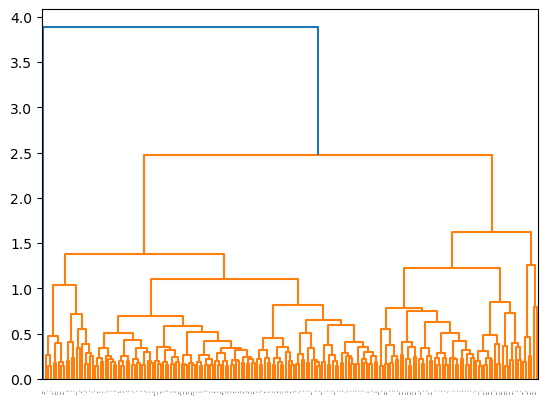

<Figure size 1500x1000 with 0 Axes>

In [19]:
# Compute linkage matrix for hierarchical clustering
dist_mat = linkage(scaled_df, method='complete', metric='cityblock')

# Generate dendrogram
dendrogram(dist_mat, truncate_mode='lastp', p=190, leaf_rotation=90., leaf_font_size=1., show_contracted=True)

# Plot the dendrogram
plt.figure(figsize=(15, 10))  # Adjust the figure size as per your preference
plt.show()

In [76]:
# Perform DIANA clustering using the specified threshold
diana_model = fcluster(dist_mat, t=0.6, criterion='distance')

In [111]:
# View the number and range of clusters
unique_clusters = np.unique(diana_model)
num_clusters = len(unique_clusters)
min_cluster = np.min(diana_model)
max_cluster = np.max(diana_model)

print("Number of clusters:", num_clusters)
print("Cluster range:", min_cluster, "-", max_cluster)
print("Cluster assignments:", unique_clusters)

Number of clusters: 19
Cluster range: 1 - 19
Cluster assignments: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [112]:
# Add cluster assignments to original dataset
df['Cluster'] = diana_model

In [113]:
# View the resulting dataset with cluster assignments
print(df.head())

          X        Y     OSM_ID   AGE    HEIGHT       AREA       VOLUME  \
0  543419.6  6865734   57858477  1883   3.71632   24.48315    90.987220   
1  546673.4  6865699  268998926  1922  13.42790   78.55155  1054.782358   
2  541880.1  6863804  277154174  1928  10.06230  194.12325  1953.326378   
3  534512.7  6869668  274436857  2006   9.05961   49.52115   448.642306   
4  534516.2  6869695  274436881  2006   9.08412   49.60280   450.597788   

   MBR_LENGTH  MBR_WIDTH   MBR_L/W  ...       ERI    CONVEX        RI  \
0    6.055625   4.049012  1.495581  ...  1.000040  1.000000  1.306094   
1   13.507686   8.995076  1.501676  ...  1.060829  1.103158  0.994926   
2   16.624235  12.257671  1.356231  ...  1.058879  1.048966  0.986375   
3   12.588276   5.426374  2.319832  ...  1.242907  1.239991  0.968679   
4   12.644883   5.385634  2.347891  ...  1.240578  1.238160  0.974568   

    DENSITY  NO_POLYLINES  BBOX(A)/AREA  PER/AREA  AREA-VOIDAREA  Cluster  \
0  1.497329             1      0.

In [114]:
# Count the number of buildings in each cluster assignment
cluster_counts = df['Cluster'].value_counts()

In [115]:
print(cluster_counts)

5     98183
6       782
4       259
8       158
16       97
3        53
7        38
12       21
2        18
18       14
1        14
14       11
15       10
17        7
9         6
13        3
10        1
11        1
19        1
Name: Cluster, dtype: int64


In [116]:
#Export CSV with Cluster Values
df.to_csv('SIZE_DIANA03.csv', index=False)

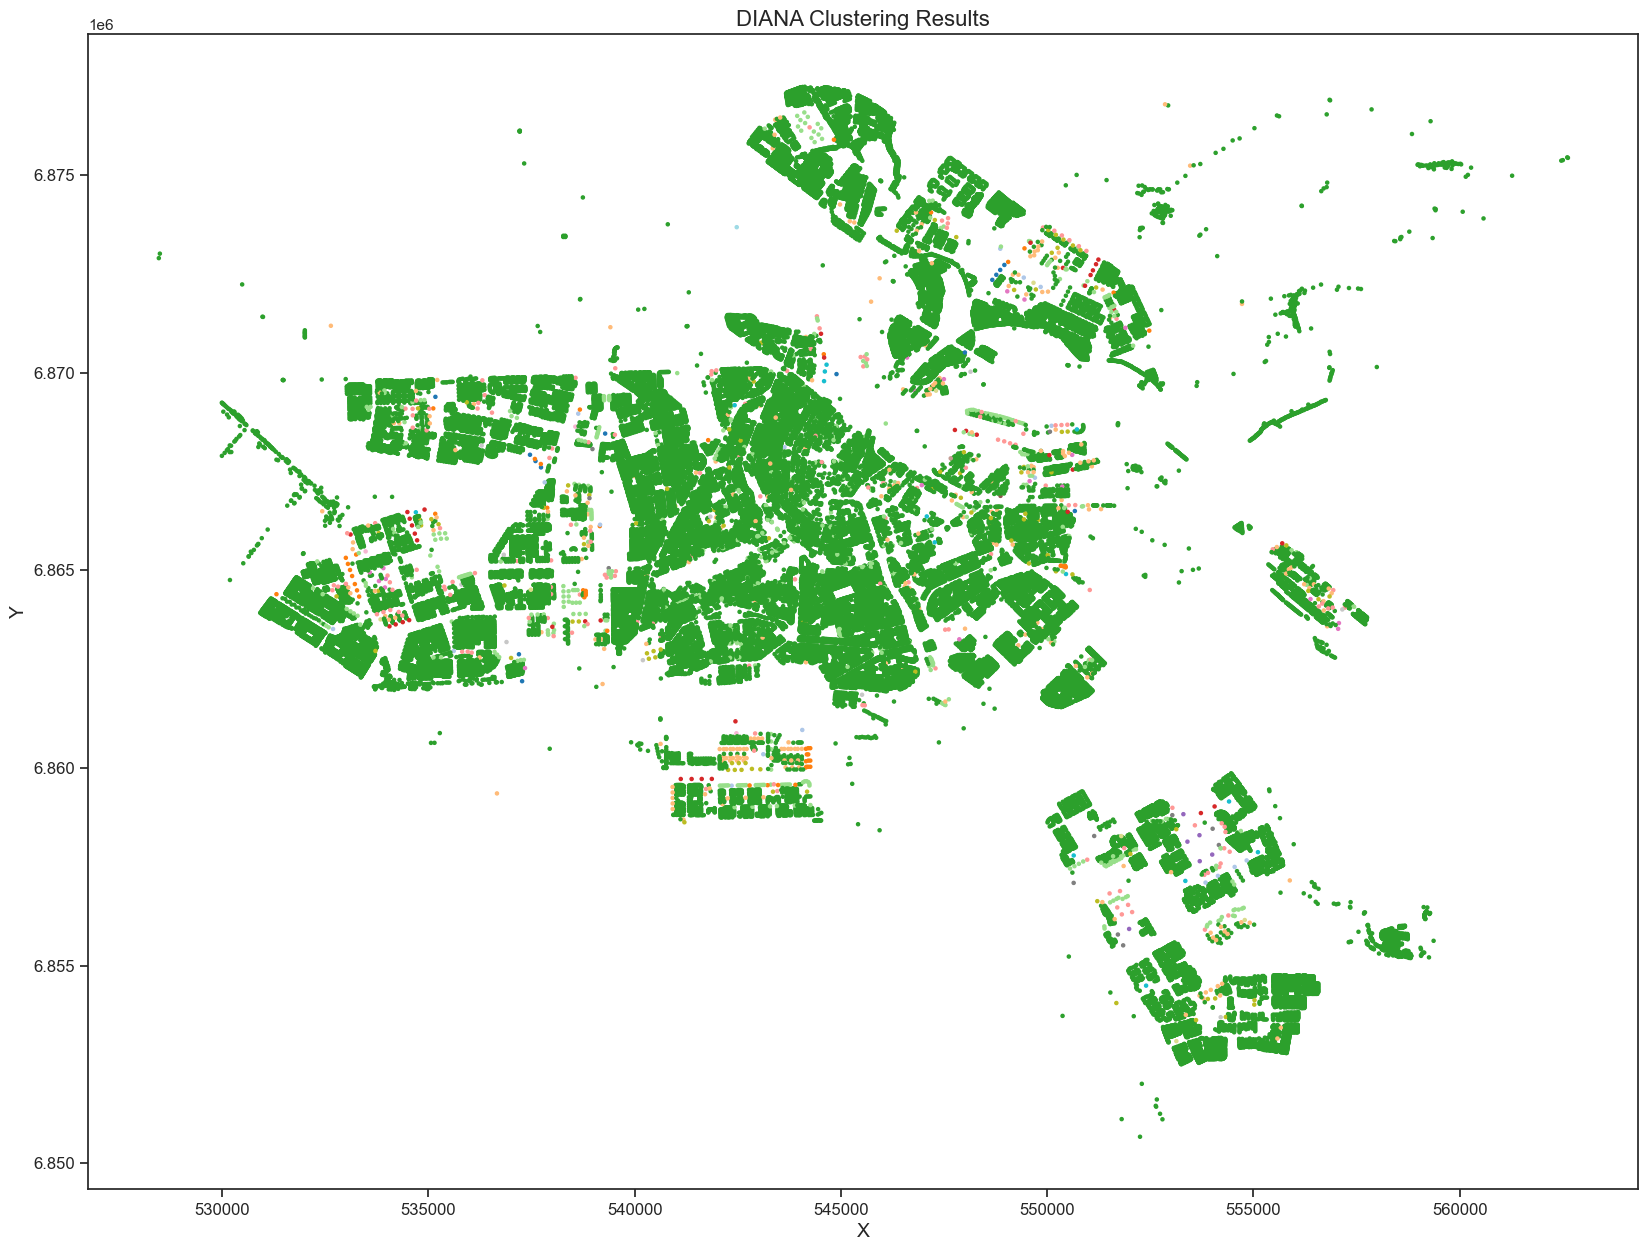

In [117]:
# Extract X and Y coordinates
x = df['X']
y = df['Y']

# Extract cluster labels
labels = df['Cluster']

# Create scatter plot with different colors for each cluster
plt.figure(figsize=(20,15)) # set figure size
plt.scatter(x, y, c=labels, cmap='tab20', s=5) # set marker size

# Add axis labels and title
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('DIANA Clustering Results', fontsize=16)

# Set axis tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

# Cluster_5_6

In [118]:
df_5_6 = df[df['Cluster'].isin([5, 6])]

In [125]:
# Extract coords from data
df_coords = df_5_6[['X', 'Y']]

# df_data   = df[['ForestPark', 'UrbanParks', 'HN_noise_40', 'RailwaySystem', 'PortSystem']]
df_data   = df_5_6.drop(["X" , "Y", "OSM_ID", "AGE", "VOLUME", "MBR_L/W", "PERIMETER", "WALL_AREA", "VERTEX_COUNT(S)", "VERTEX_COMPLEXITY", "ERI", "CONVEX", "RI", "DENSITY", "NO_POLYLINES", "BBOX(A)/AREA", "PER/AREA", "AREA-VOIDAREA"], axis=1)

# Scale data
scaler = MinMaxScaler()
scaled_df02 = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns)

In [120]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['X'].to_numpy()[labels == label]
        y = coords['Y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [121]:
#Export CSV with Cluster Values
#df_5_6.to_csv('Cluster_5_6.csv', index=False)

In [130]:
df_5_6

,X,Y,OSM_ID,AGE,HEIGHT,AREA,VOLUME,MBR_LENGTH,MBR_WIDTH,MBR_L/W,...,ERI,CONVEX,RI,DENSITY,NO_POLYLINES,BBOX(A)/AREA,PER/AREA,AREA-VOIDAREA,Cluster,Cluster_5_6
0,543419.6,6865734,57858477,1883,3.71632,24.48315,90.987220,6.055625,4.049012,1.495581,...,1.000040,1.000000,1.306094,1.497329,1,0.998526,0.824860,24.48315,5,5
1,546673.4,6865699,268998926,1922,13.42790,78.55155,1054.782358,13.507686,8.995076,1.501676,...,1.060829,1.103158,0.994926,1.253656,1,0.646501,0.488698,78.55155,5,5
2,541880.1,6863804,277154174,1928,10.06230,194.12325,1953.326378,16.624235,12.257671,1.356231,...,1.058879,1.048966,0.986375,2.277253,1,0.952638,0.307531,194.12325,5,5
3,534512.7,6869668,274436857,2006,9.05961,49.52115,448.642306,12.588276,5.426374,2.319832,...,1.242907,1.239991,0.968679,1.159254,1,0.724961,0.769948,49.52115,5,5
4,534516.2,6869695,274436881,2006,9.08412,49.60280,450.597788,12.644883,5.385634,2.347891,...,1.240578,1.238160,0.974568,1.152680,1,0.728374,0.769721,49.60280,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99666,539426.5,6864817,1148323938,2010,21.40250,561.39740,12015.307850,33.387906,16.956728,1.969006,...,0.999972,1.000000,1.395639,3.336369,1,0.991606,0.178595,561.39740,6,6
99668,539425.3,6864896,1148323940,2010,21.41250,565.26760,12103.792490,33.193771,17.033181,1.948771,...,0.999964,1.000000,1.391687,3.394053,1,0.999774,0.177684,565.26760,6,6
99673,539451.3,6864975,1148325665,2009,21.48500,563.27785,12102.024610,33.124007,17.082735,1.939034,...,1.000311,0.999591,1.391043,3.379386,1,0.995457,0.177916,563.27785,6,6
99674,539371.8,6864973,1148325666,2009,21.49140,561.30960,12063.329140,33.068424,16.976136,1.947936,...,0.999925,0.999915,1.391525,3.359846,1,0.999885,0.178290,561.30960,6,6


In [132]:
# Compute linkage matrix for hierarchical clustering
dist_mat5_6 = linkage(scaled_df02, method='complete', metric='cityblock')

# Generate dendrogram
dendrogram(dist_mat5_6, truncate_mode='lastp', p=190, leaf_rotation=90., leaf_font_size=1., show_contracted=True)

# Plot the dendrogram
plt.figure(figsize=(15, 10))  # Adjust the figure size as per your preference
plt.show()

MemoryError: Unable to allocate 36.5 GiB for an array with shape (4896986130,) and data type float64

In [ ]:
# Perform DIANA clustering using the specified threshold
diana_model5_6 = fcluster(dist_mat5_6, t=0.5, criterion='distance')

In [ ]:
# View the number and range of clusters
unique_clusters5_6 = np.unique(diana_model5_6)
num_clusters = len(unique_clusters5_6)
min_cluster = np.min(diana_model5_6)
max_cluster = np.max(diana_model5_6)

print("Number of clusters:", num_clusters)
print("Cluster range:", min_cluster, "-", max_cluster)
print("Cluster assignments:", unique_clusters)

In [ ]:
# Add cluster assignments to original dataset
df_5_6['Cluster_5_6'] = diana_model5_6

In [ ]:
# View the resulting dataset with cluster assignments
print(df_5_6.head())

In [ ]:
# Count the number of buildings in each cluster assignment
cluster_counts_5_6 = df['Cluster_5_6'].value_counts()

In [ ]:
print(cluster_counts_5_6)